# **Bibliotecas**

In [48]:
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum
import seaborn as sns
import matplotlib.pyplot as plt

# **Codigo:**

In [49]:
spark = SparkSession.builder \
    .appName("PCA_Spotify") \
    .getOrCreate()

In [50]:
df = spark.read.csv("spotify_songs.csv", header=True, inferSchema=True)

# **Visualização**

In [51]:
df.show()

+--------------------+--------------------+----------------+----------------+--------------------+--------------------+------------------------+-------------+--------------------+--------------+-----------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+-----------+
|            track_id|          track_name|    track_artist|track_popularity|      track_album_id|    track_album_name|track_album_release_date|playlist_name|         playlist_id|playlist_genre|playlist_subgenre|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|duration_ms|
+--------------------+--------------------+----------------+----------------+--------------------+--------------------+------------------------+-------------+--------------------+--------------+-----------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+-----------+
|6f807x0im

In [52]:
df_pd = df.toPandas()
df_pd.head(20)
#Visualização em pandas que é melhor

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.10200,0.000000,0.0653,0.518,122.036,194754.0
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.07240,0.004210,0.3570,0.693,99.972,162600.0
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.07940,0.000023,0.1100,0.613,124.008,176616.0
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.02870,0.000009,0.2040,0.277,121.956,169093.0
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.08030,0.000000,0.0833,0.725,123.976,189052.0
5,7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,8,-5.385,1,0.1270,0.07990,0.000000,0.1430,0.585,124.982,163049.0
6,2OAylPUDDfwRGfe0lYqlCQ,Never Really Over - R3HAB Remix,Katy Perry,62,7INHYSeusaFlyrHSNxm8qH,Never Really Over (R3HAB Remix),2019-07-26,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,5,-4.788,0,0.0623,0.18700,0.000000,0.1760,0.152,112.648,187675.0
7,6b1RNvAcJjQH73eZO4BLAB,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69,6703SRPsLkS4bPtMFFJes1,Post Malone (feat. RANI) [GATTÜSO Remix],2019-08-29,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,4,-2.419,0,0.0434,0.03350,0.000005,0.1110,0.367,127.936,207619.0
8,7bF6tCO3gFb8INrEDcjNT5,Tough Love - Tiësto Remix / Radio Edit,Avicii,68,7CvAfGvq4RlIwEbT9o8Iav,Tough Love (Tiësto Remix),2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,8,-3.562,1,0.0565,0.02490,0.000004,0.6370,0.366,127.015,193187.0
9,1IXGILkPm0tOCNeq00kCPa,If I Can't Have You - Gryffin Remix,Shawn Mendes,67,4QxzbfSsVryEQwvPFEV5Iu,If I Can't Have You (Gryffin Remix),2019-06-20,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,2,-4.552,1,0.0320,0.05670,0.000000,0.0919,0.590,124.957,253040.0


In [53]:
df.printSchema()

root
 |-- track_id: string (nullable = true)
 |-- track_name: string (nullable = true)
 |-- track_artist: string (nullable = true)
 |-- track_popularity: integer (nullable = true)
 |-- track_album_id: string (nullable = true)
 |-- track_album_name: string (nullable = true)
 |-- track_album_release_date: string (nullable = true)
 |-- playlist_name: string (nullable = true)
 |-- playlist_id: string (nullable = true)
 |-- playlist_genre: string (nullable = true)
 |-- playlist_subgenre: string (nullable = true)
 |-- danceability: string (nullable = true)
 |-- energy: string (nullable = true)
 |-- key: string (nullable = true)
 |-- loudness: string (nullable = true)
 |-- mode: string (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- duration_ms: double (nullable = true)


# Verificação de dados faltantes

In [54]:
valores_faltantes = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
valores_faltantes.show()
#Não tem nenhum valor faltante na tabela

+--------+----------+------------+----------------+--------------+----------------+------------------------+-------------+-----------+--------------+-----------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-----+-----------+
|track_id|track_name|track_artist|track_popularity|track_album_id|track_album_name|track_album_release_date|playlist_name|playlist_id|playlist_genre|playlist_subgenre|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|tempo|duration_ms|
+--------+----------+------------+----------------+--------------+----------------+------------------------+-------------+-----------+--------------+-----------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-----+-----------+
|       0|         0|           0|               0|             0|               0|                       0|            0|          0|             0|  

# Verificar se a linhas duplicadas

In [55]:
duplicatas = df.count() - df.dropDuplicates().count()
print(f"Número de linhas duplicadas: {duplicatas}")
#Não a linhas inteiras duplicadas tambem

Número de linhas duplicadas: 0


# Tipos de dados

In [56]:
colunas_escritas = [f.name for f in df.schema.fields if f.dataType.simpleString() == 'string']
colunas_numericas = [f.name for f in df.schema.fields if f.dataType.simpleString() in ['int', 'double', 'float', 'long']]
print("Colunas escritas:", colunas_escritas)
print("Colunas numéricas:", colunas_numericas)

Colunas escritas: ['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness', 'mode']
Colunas numéricas: ['track_popularity', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


# Plot de graficos para visualização

**track_popularity**

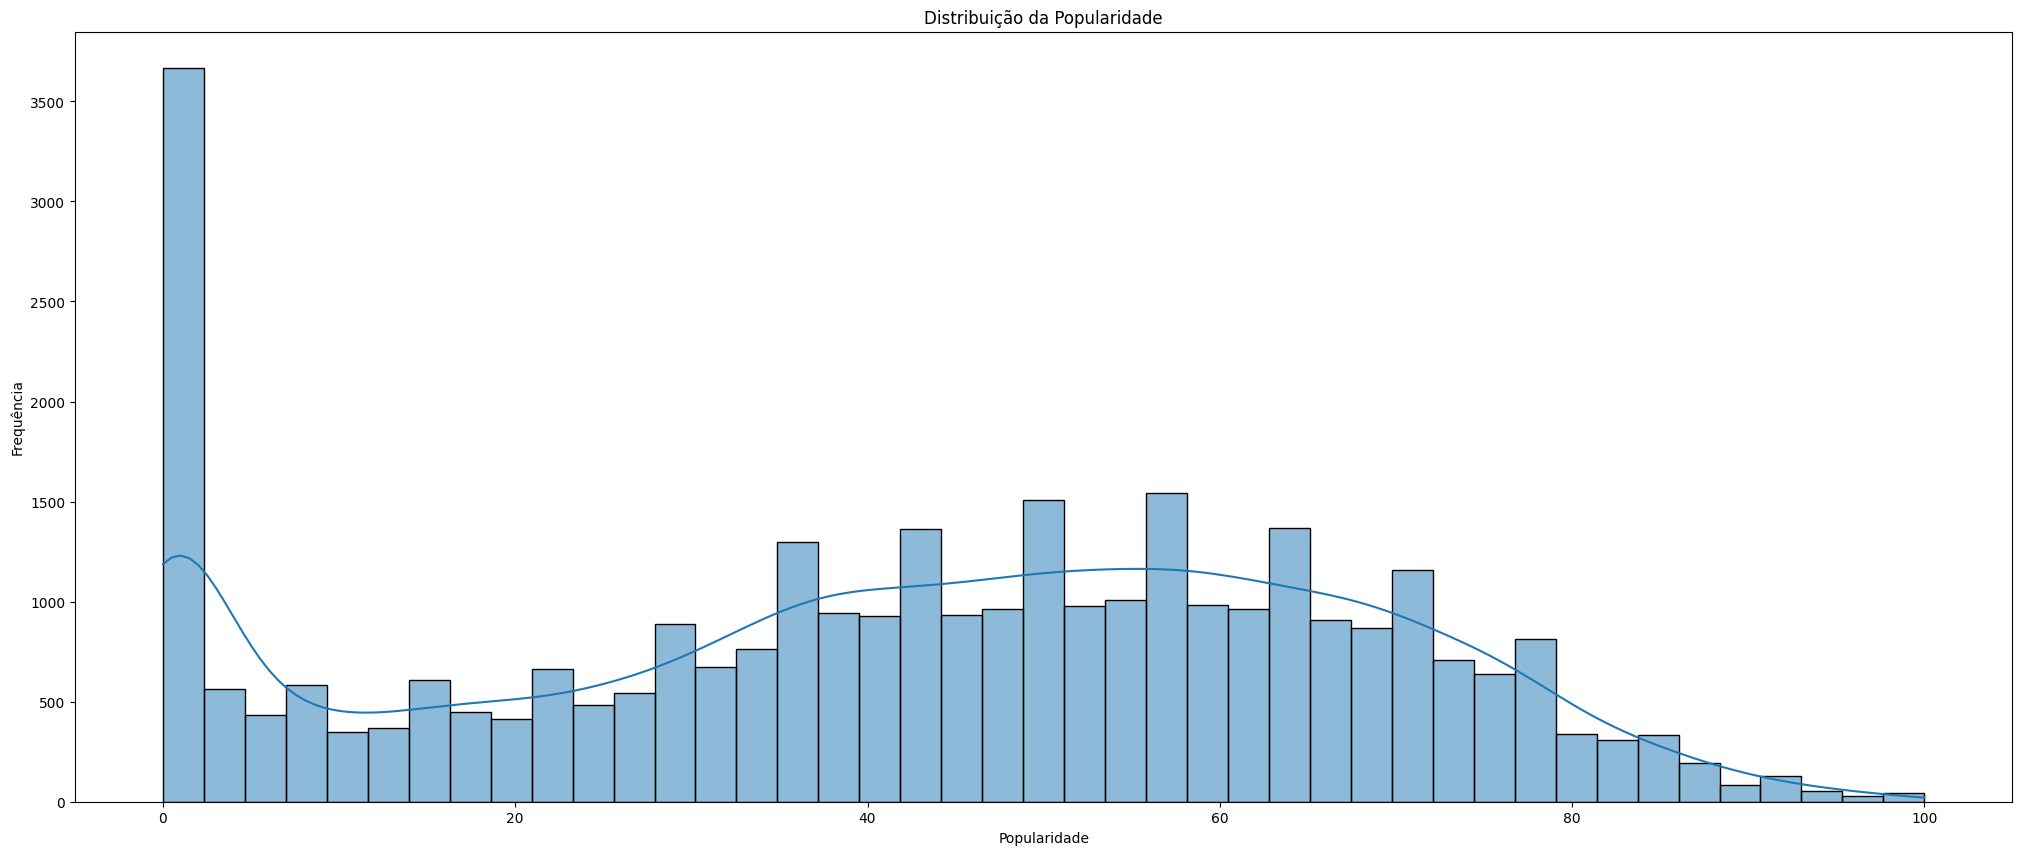

In [69]:
plt.figure(figsize=(25,10))
sns.histplot(df_pd['track_popularity'], kde=True)
plt.title("Distribuição da Popularidade")
plt.xlabel("Popularidade")
plt.ylabel("Frequência")
plt.show()

**speechiness**

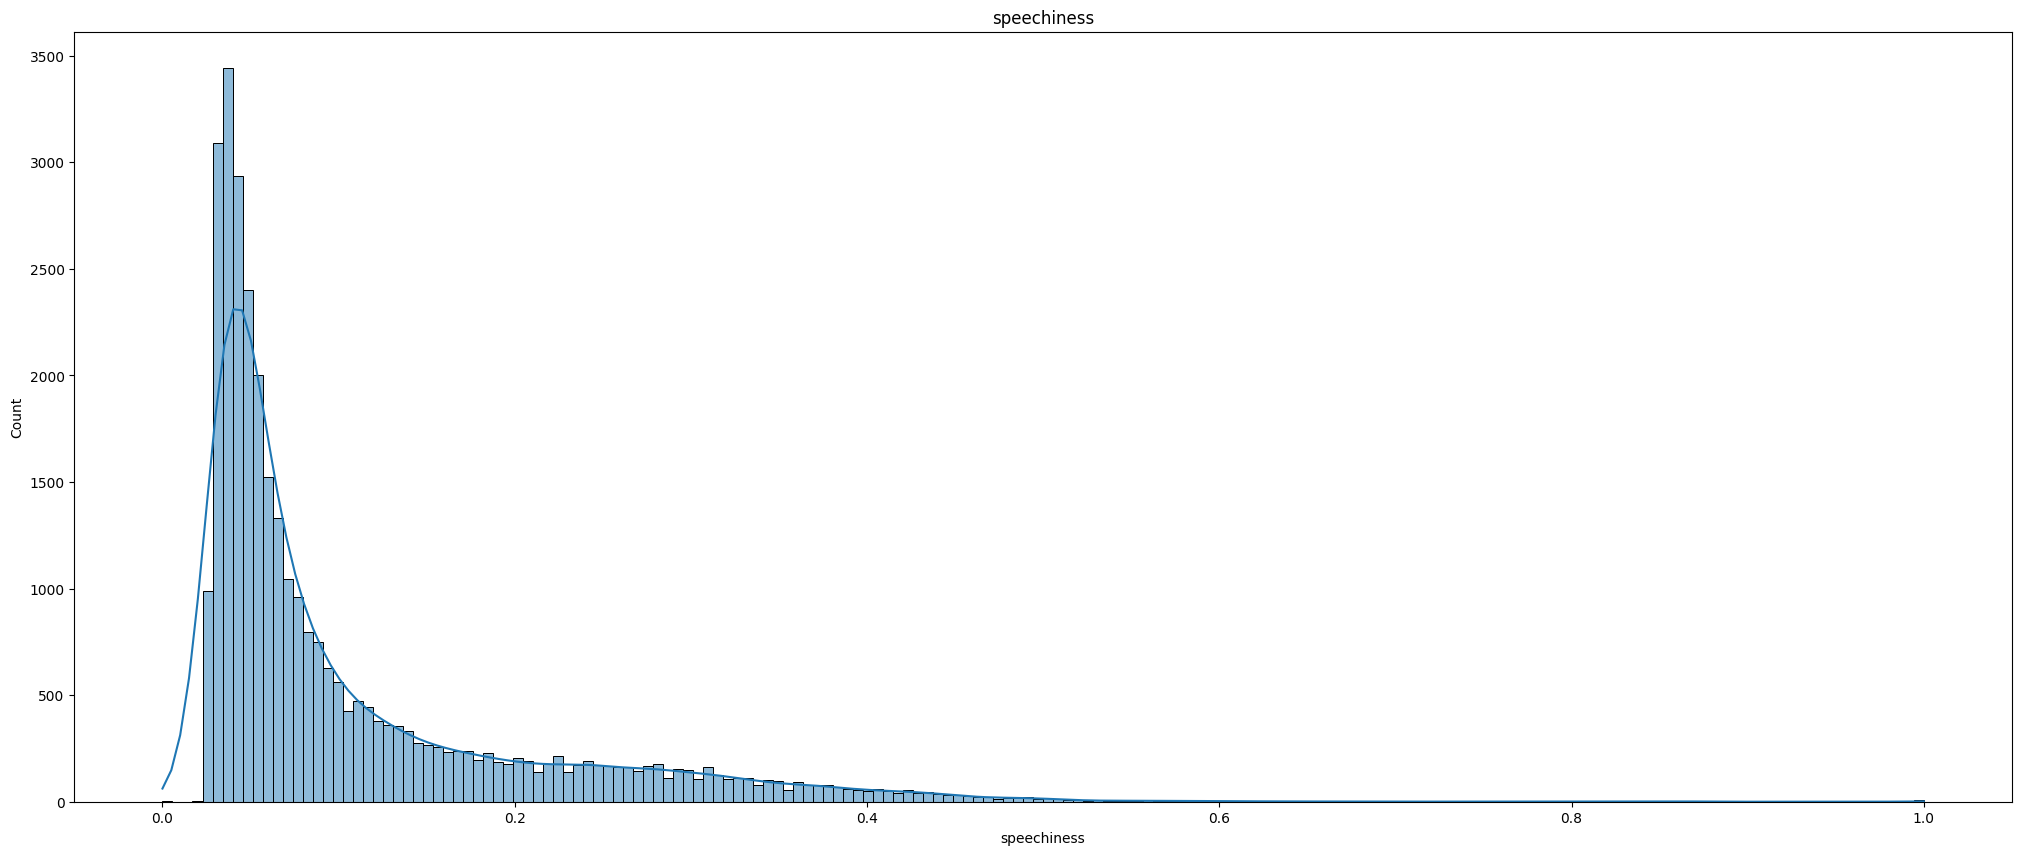

In [68]:
plt.figure(figsize=(25,10))
sns.histplot(df_pd['speechiness'], kde=True)
plt.title("speechiness")
plt.show()

**acousticness**

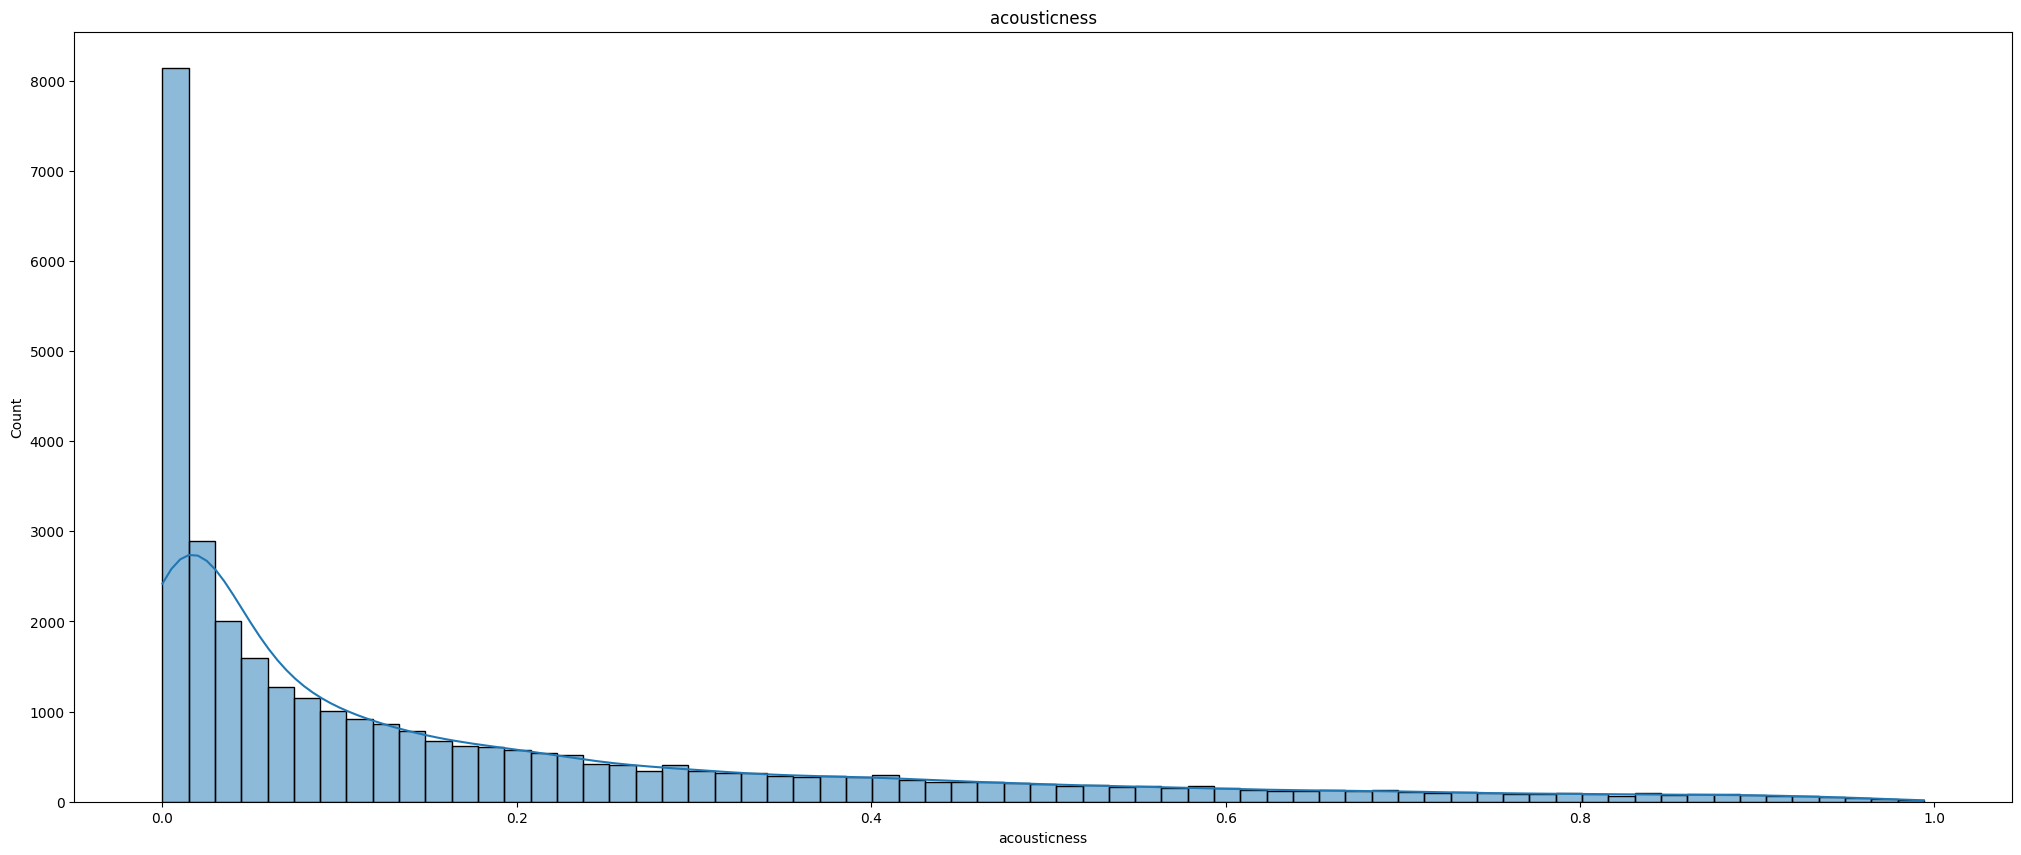

In [70]:
plt.figure(figsize=(25,10))
sns.histplot(df_pd['acousticness'], kde=True)
plt.title("acousticness")
plt.show()

**valence**

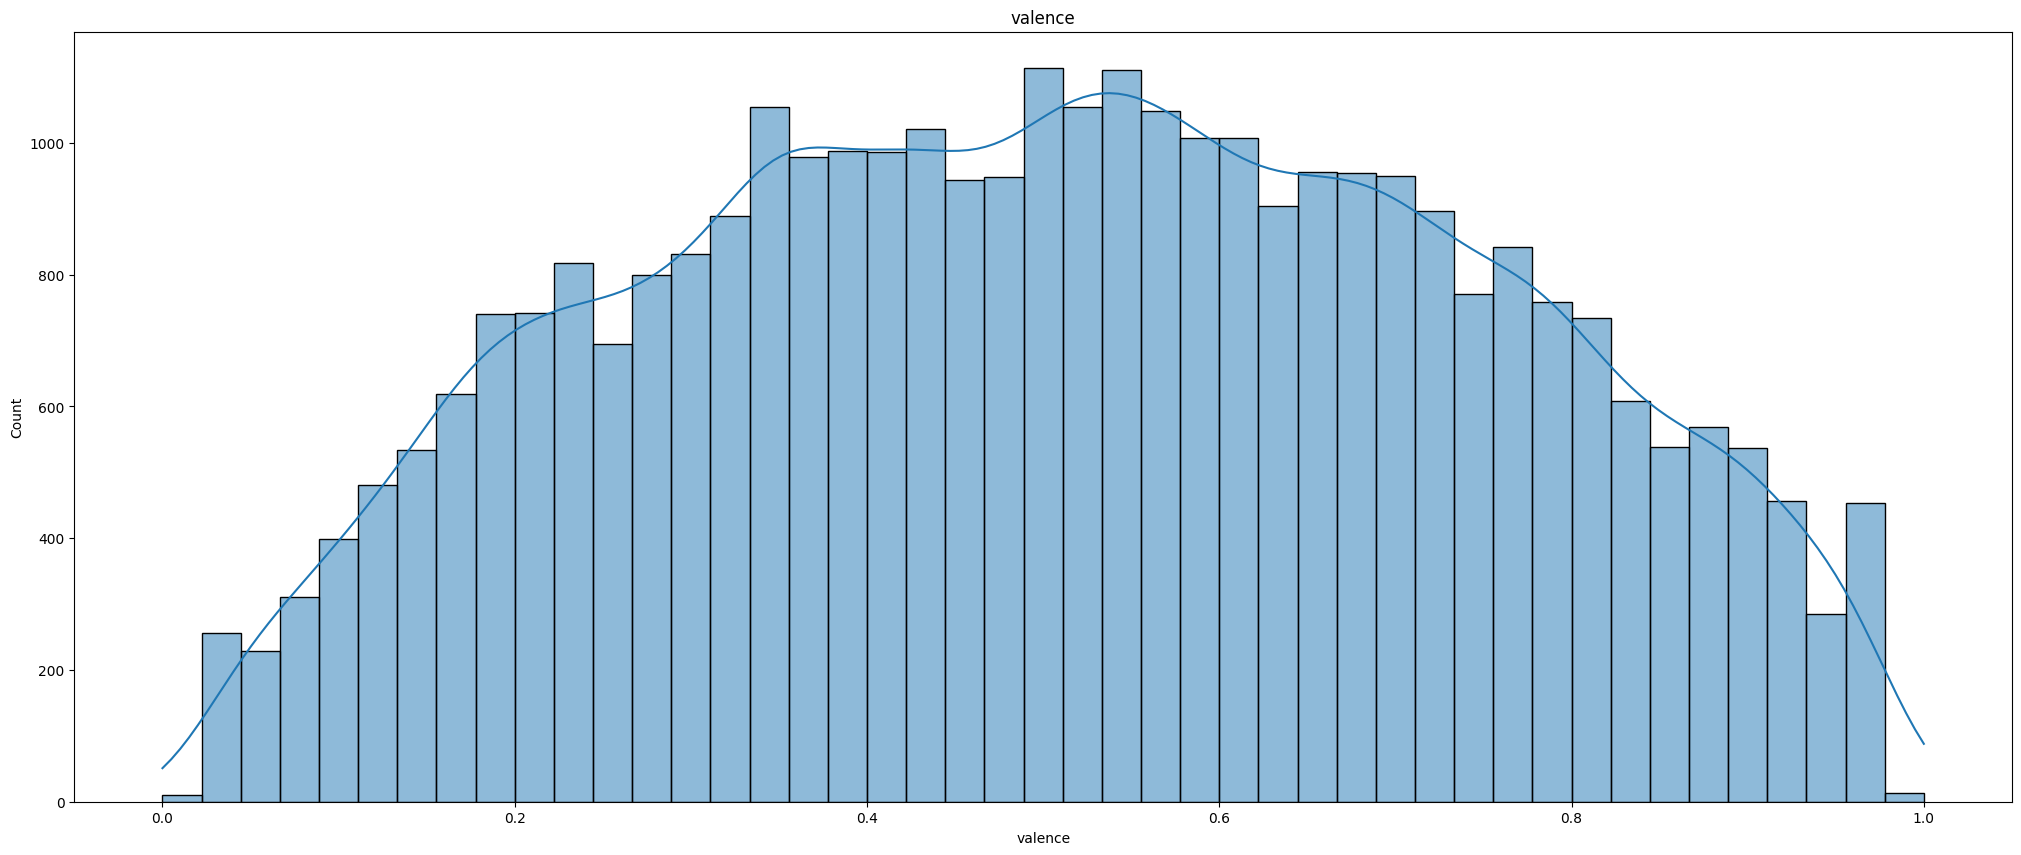

In [73]:
plt.figure(figsize=(25,10))
sns.histplot(df_pd['valence'], kde=True)
plt.title("valence")
plt.show()

**liveness**

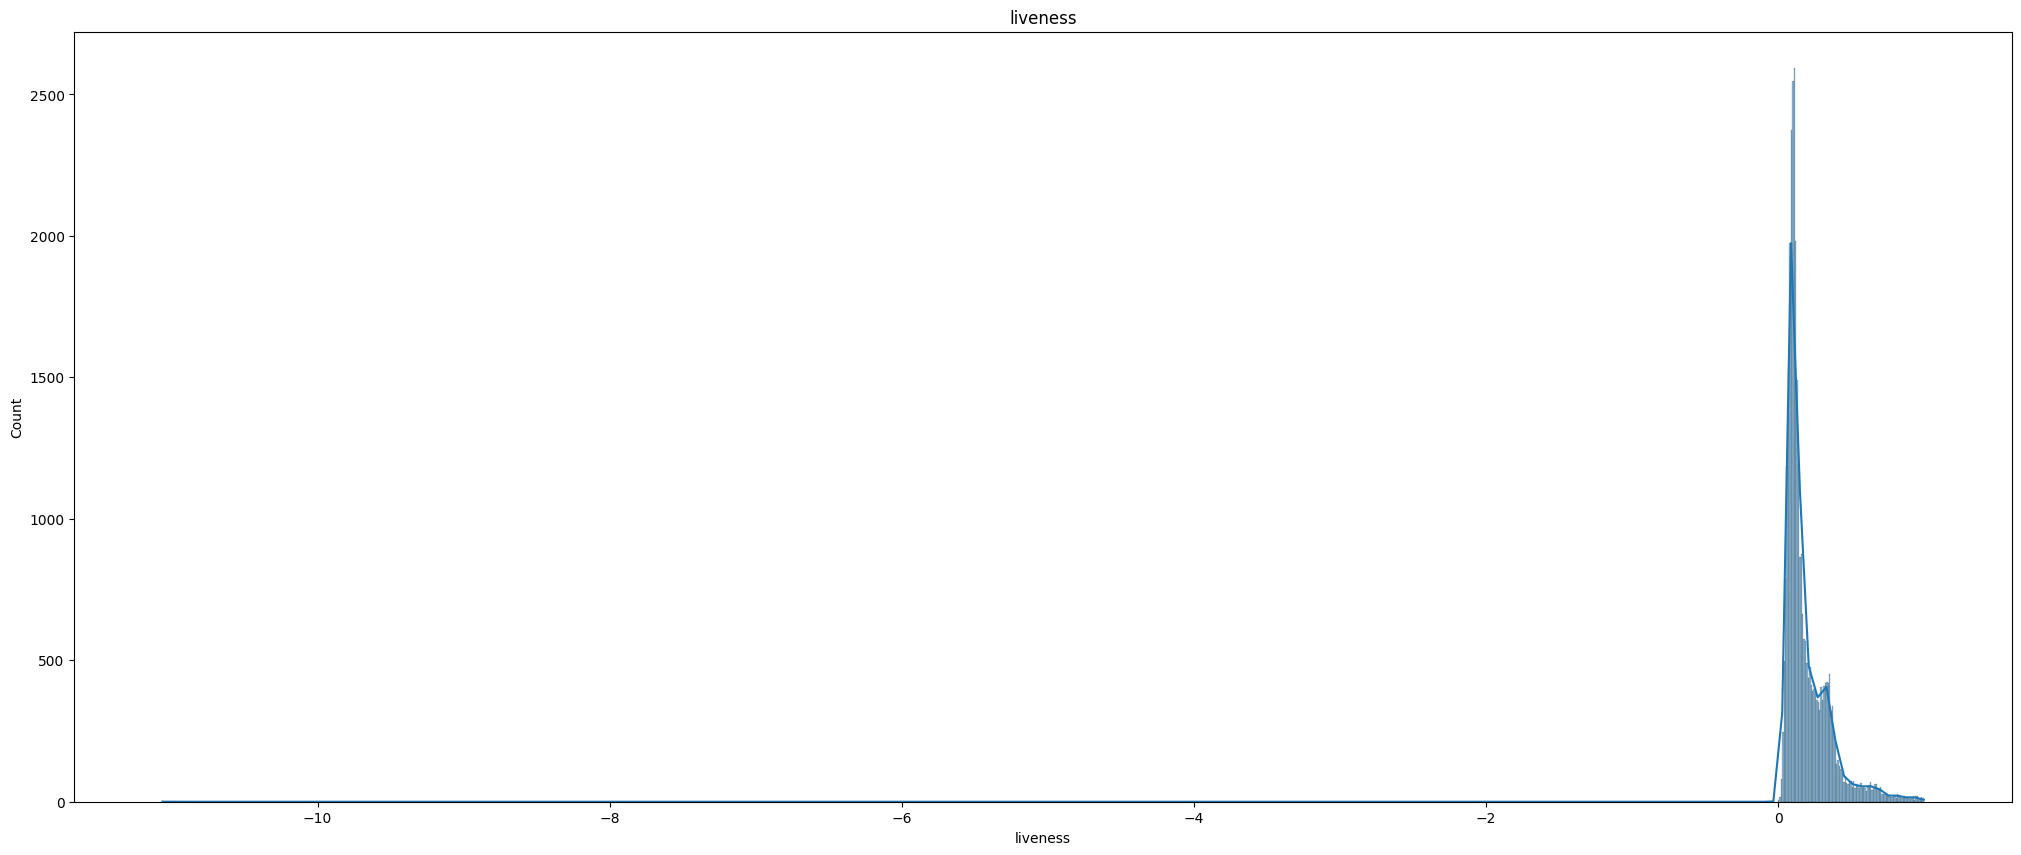

In [72]:
plt.figure(figsize=(25,10))
sns.histplot(df_pd['liveness'], kde=True)
plt.title("liveness")
plt.show()

**tempo**

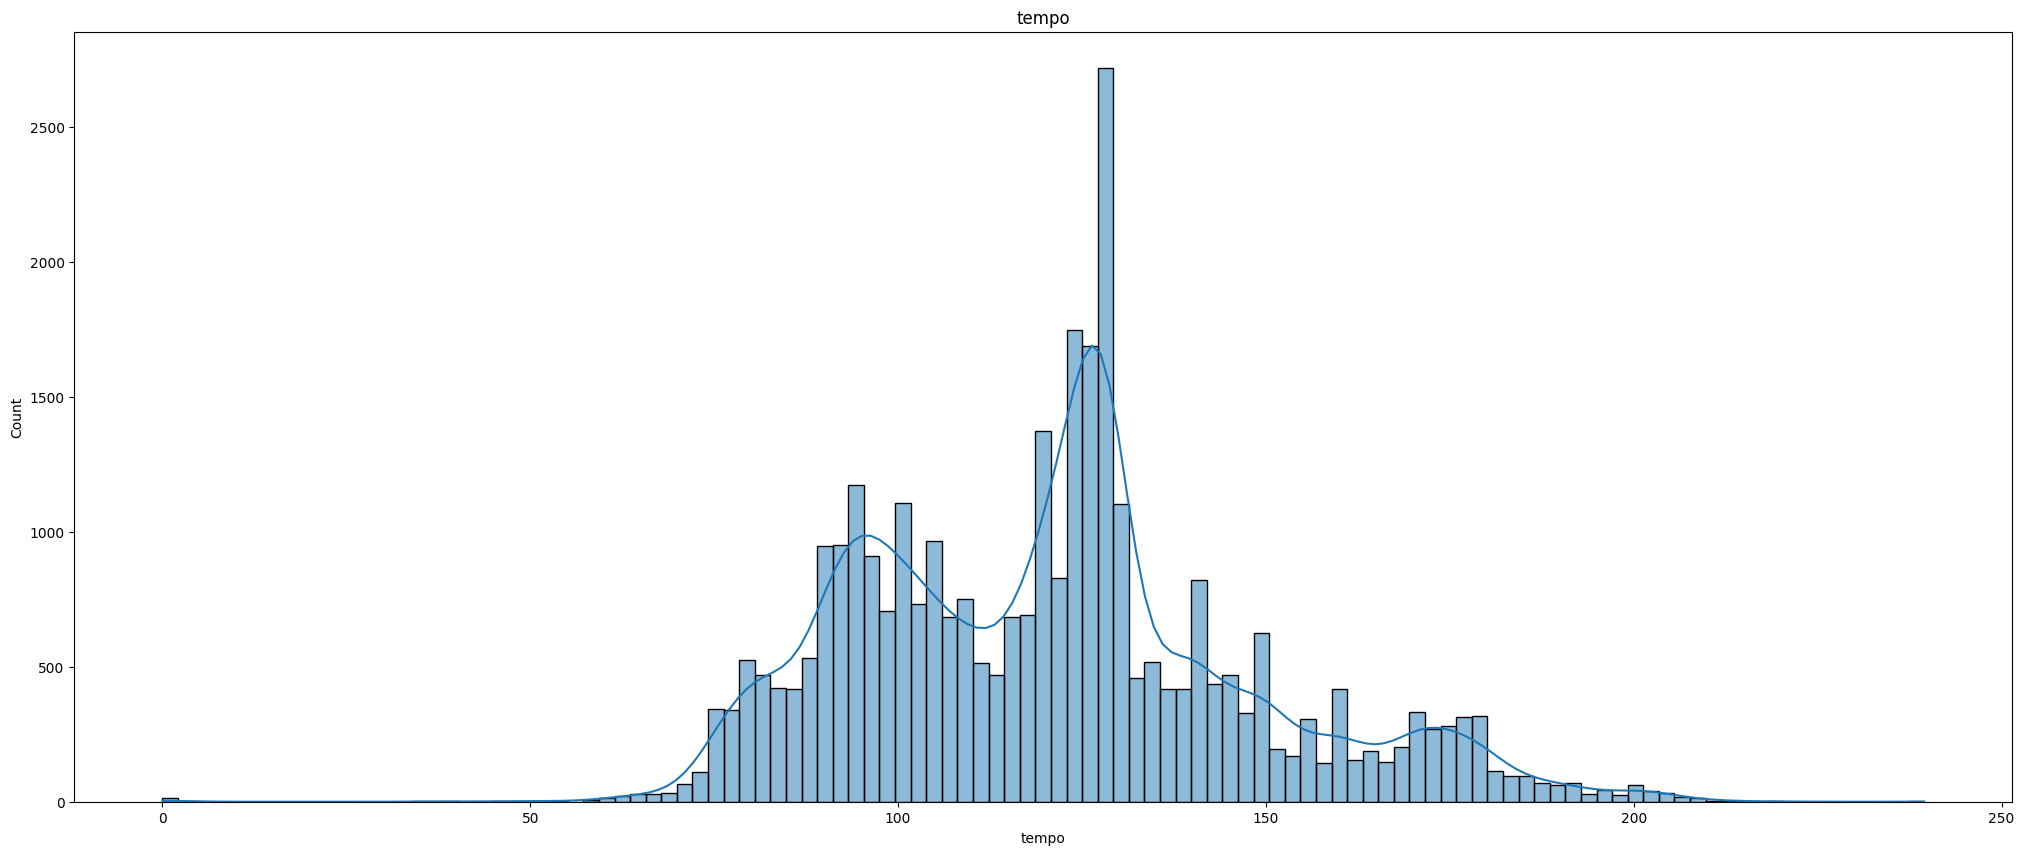

In [74]:
plt.figure(figsize=(25,10))
sns.histplot(df_pd['tempo'], kde=True)
plt.title("tempo")
plt.show()

**duration_ms**

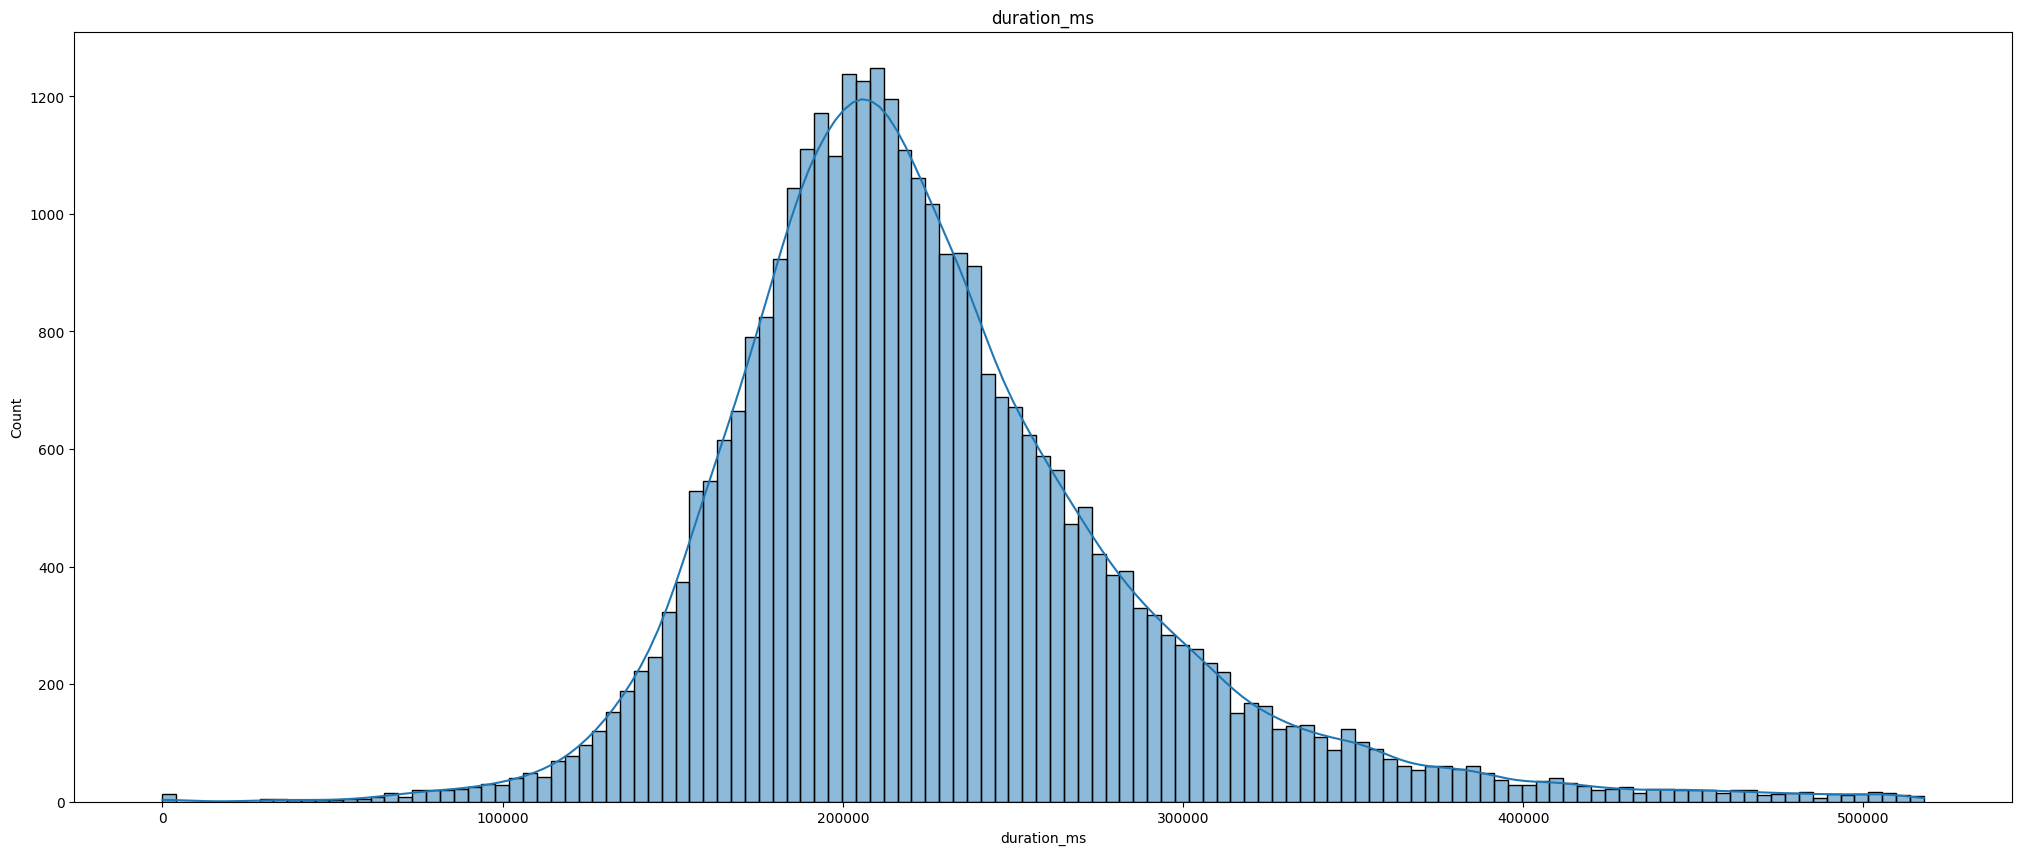

In [75]:
plt.figure(figsize=(25,10))
sns.histplot(df_pd['duration_ms'], kde=True)
plt.title("duration_ms")
plt.show()

In [82]:
df.select("track_name", "track_artist", "track_popularity") \
  .orderBy(col("track_popularity").desc()) \
  .show(10, truncate=False)

+---------------+--------------+----------------+
|track_name     |track_artist  |track_popularity|
+---------------+--------------+----------------+
|Dance Monkey   |Tones and I   |100             |
|Dance Monkey   |Tones and I   |100             |
|ROXANNE        |Arizona Zervas|99              |
|ROXANNE        |Arizona Zervas|99              |
|ROXANNE        |Arizona Zervas|99              |
|ROXANNE        |Arizona Zervas|99              |
|Blinding Lights|The Weeknd    |98              |
|Memories       |Maroon 5      |98              |
|The Box        |Roddy Ricch   |98              |
|Tusa           |KAROL G       |98              |
+---------------+--------------+----------------+
only showing top 10 rows



In [83]:
for coluna in df.columns:
    print(f"\n📌 Coluna: {coluna}")

    df.groupBy(coluna) \
      .count() \
      .filter("count > 1") \
      .orderBy("count", ascending=False) \
      .show(5, truncate=False)  # Mostra os 5 valores mais duplicados


📌 Coluna: track_id
+----------------------+-----+
|track_id              |count|
+----------------------+-----+
|7BKLCZ1jbUBVqRi2FVlTVw|10   |
|14sOS5L36385FJ3OL8hew4|9    |
|3eekarcy7kvN4yt5ZFzltW|9    |
|7LzouaWGFCy4tkXDOOnEyM|8    |
|6oJ6le65B3SEqPwMRNXWjY|8    |
+----------------------+-----+
only showing top 5 rows


📌 Coluna: track_name
+----------+-----+
|track_name|count|
+----------+-----+
|Poison    |22   |
|Breathe   |21   |
|Forever   |20   |
|Alive     |20   |
|Paradise  |19   |
+----------+-----+
only showing top 5 rows


📌 Coluna: track_artist
+----------------+-----+
|track_artist    |count|
+----------------+-----+
|Martin Garrix   |161  |
|Queen           |136  |
|The Chainsmokers|123  |
|David Guetta    |110  |
|Don Omar        |102  |
+----------------+-----+
only showing top 5 rows


📌 Coluna: track_popularity
+----------------+-----+
|track_popularity|count|
+----------------+-----+
|0               |2703 |
|1               |575  |
|57              |541  |
|54   

In [84]:
for coluna in df.columns:
    total = df.select(coluna).count()
    distintos = df.select(coluna).distinct().count()
    duplicados = total - distintos
    print(f"🔁 {coluna}: {duplicados} valores duplicados")

🔁 track_id: 4477 valores duplicados
🔁 track_name: 9383 valores duplicados
🔁 track_artist: 22140 valores duplicados
🔁 track_popularity: 32732 valores duplicados
🔁 track_album_id: 10288 valores duplicados
🔁 track_album_name: 13089 valores duplicados
🔁 track_album_release_date: 28302 valores duplicados
🔁 playlist_name: 32382 valores duplicados
🔁 playlist_id: 32354 valores duplicados
🔁 playlist_genre: 32819 valores duplicados
🔁 playlist_subgenre: 32806 valores duplicados
🔁 danceability: 32006 valores duplicados
🔁 energy: 31880 valores duplicados
🔁 key: 32810 valores duplicados
🔁 loudness: 22610 valores duplicados
🔁 mode: 32820 valores duplicados
🔁 speechiness: 31562 valores duplicados
🔁 acousticness: 29102 valores duplicados
🔁 instrumentalness: 28104 valores duplicados
🔁 liveness: 31204 valores duplicados
🔁 valence: 31469 valores duplicados
🔁 tempo: 15144 valores duplicados
🔁 duration_ms: 13043 valores duplicados
